In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [5]:
data = pd.read_csv('1830151.csv')
data.shape

(50000, 19)

In [6]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [7]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200780383,MEIJ,2019-07-10 00:00:00,2019.0,1.929535e+09,2019-06-24,20190624,20190624,20190709.0,USD,RV,1.0,NaN,52499.91,20190624.0,NAA8,1.929535e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-01-09 00:00:00,2019.0,1.928539e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,34233.17,20181230.0,NAH4,1.928539e+09,0
2,U001,0200769623,WAL-MAR associates,2019-07-26 00:00:00,2019.0,1.929624e+09,2019-07-16,20190716,20190716,20190731.0,USD,RV,1.0,NaN,55955.58,20190716.0,NAH4,1.929624e+09,0
3,U001,0200769623,WAL-MAR systems,2019-12-09 00:00:00,2019.0,1.930184e+09,2019-11-22,20191122,20191122,20191207.0,USD,RV,1.0,NaN,6142.90,20191122.0,NAH4,1.930184e+09,0
4,U001,0200936373,SUPE us,2019-06-27 00:00:00,2019.0,1.929478e+09,2019-06-11,20190612,20190611,20190626.0,USD,RV,1.0,NaN,32792.21,20190611.0,NAA8,1.929478e+09,0


In [8]:
[col for col in data.columns if data[col].isnull().sum() > 0]

['clear_date', 'area_business', 'invoice_id']

In [9]:
[data[col].isnull().sum() for col in data.columns if data[col].isnull().sum() > 0]

[4041, 50000, 4]

In [10]:
df=data

In [11]:
def convert_to_date(x):
    return x[:4] + '-' + x[4:6] + '-' + x[6:]

In [12]:
df['clear_date']=pd.to_datetime(df['clear_date'])
df['posting_date']=pd.to_datetime(df['posting_date'])
df['due_in_date']=pd.to_datetime(df['due_in_date'].astype(int).astype(str).map(lambda x: convert_to_date(x)))
df['document_create_date']=pd.to_datetime(df['document_create_date'].astype(int).astype(str).map(lambda x: convert_to_date(x)))
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'].astype(int).astype(str).map(lambda x: convert_to_date(x)))
df['buisness_year']=df['buisness_year'].astype(int)

In [13]:
data=df.sort_values(by='baseline_create_date',ignore_index=True)

In [14]:
data_train=data.loc[data['clear_date'].notna()]
data_train=data_train.reset_index(drop=True)
data_null_cleardate=data.loc[data['clear_date'].isna()]
data_null_cleardate=data_null_cleardate.reset_index(drop=True)


In [15]:
df=data_train

In [54]:
'''for column in df:
    print(column)
    print(df[column].value_counts())
    print()'''

'for column in df:\n    print(column)\n    print(df[column].value_counts())\n    print()'

In [55]:
[col for col in df.columns if df[col].isnull().sum() > 0]

['area_business', 'invoice_id']

In [56]:
[df[col].isnull().sum() for col in df.columns if df[col].isnull().sum() > 0]

[45959, 4]

In [57]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [58]:
data_init=df[['doc_id','posting_id','total_open_amount', 'isOpen']]
for c in data_init:
    data_init[c]=data_init[c].astype(int)
sel = VarianceThreshold(threshold=0)
sel.fit(data_init)

<ipython-input-58-7d3690fde138>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_init[c]=data_init[c].astype(int)


VarianceThreshold(threshold=0)

In [59]:
sum(sel.get_support()) # not constant

2

In [60]:
[x for x in data_init.columns if x not in data_init.columns[sel.get_support()]]

['posting_id', 'isOpen']

In [61]:
data_init=data_init.drop(['posting_id','isOpen'],axis=1)

In [62]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(data_init)

VarianceThreshold(threshold=0.01)

In [63]:
len(data_init.columns[sel.get_support()]) # not quasi constant

2

In [64]:
[x for x in data_init.columns if x not in data_init.columns[sel.get_support()]]

[]

In [65]:
df['cust_number'].loc[df['cust_number'].str.isdigit()!=True]

20       CCU013
37       CC5050
39       CCU013
45       CCU013
123      CC7470
          ...  
45846    CCCA02
45873    CCU013
45884    CCCA02
45896    CCCA02
45913    CCU013
Name: cust_number, Length: 1557, dtype: object

In [66]:
df=df.drop(['posting_id','area_business','doc_id','document_create_date.1','invoice_id', 'isOpen'],axis=1)

In [67]:
bins=[pd.Timedelta("-9999 days"),pd.Timedelta("0 days"),pd.Timedelta("16 days"),pd.Timedelta("31 days"),pd.Timedelta("46 days"),pd.Timedelta("61 days"),pd.Timedelta("9999 days")]
labels=['Before Due date','0-15 days','16-30 days','31-45 days','46-60 days','Greater than 60 days']
abc=pd.cut(df['clear_date']-df['due_in_date'], bins=bins, labels=labels, right=False)
abc=abc.rename('age_bucket').to_frame()
df=pd.concat([df,abc],axis=1)

In [88]:
df

,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,age_bucket
0,CA02,0140104409,LOB us,2019,2019-03-29,2019-03-29,2018-12-06,CAD,X2,420.40,2018-11-26,CA10,Greater than 60 days
1,CA02,0140120967,VEG PR corp,2019,2019-01-11,2019-01-11,2018-12-17,CAD,RV,250.00,2018-12-07,CA10,Greater than 60 days
2,CA02,0140104429,COSTCO associates,2019,2019-01-11,2019-01-11,2019-01-07,CAD,RV,728.00,2018-12-28,CA10,31-45 days
3,U001,0200769623,WAL-MAR associates,2019,2018-12-30,2018-12-29,2019-01-14,USD,RV,6049.92,2018-12-30,NAH4,0-15 days
4,U001,0200726979,BJ'S foundation,2019,2018-12-30,2018-12-29,2019-01-14,USD,RV,58.18,2018-12-30,NAA8,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,CA02,0140106293,ATLANT co,2020,2020-02-26,2020-02-26,2020-03-16,CAD,RV,44.27,2020-03-06,CA10,0-15 days
45955,CA02,0140106293,ATLANT,2020,2020-02-26,2020-02-26,2020-03-16,CAD,RV,10782.47,2020-03-06,CA10,0-15 days
45956,CA02,0140105578,GIZE systems,2020,2020-02-25,2020-02-25,2020-03-16,CAD,RV,129656.43,2020-03-06,CA10,0-15 days
45957,U001,0200424504,M associates,2020,2020-02-07,2020-02-06,2020-03-15,USD,RV,6412.66,2020-03-15,NACE,0-15 days


In [81]:
df.drop(['clear_date'],axis=1,inplace=True)

In [84]:
X_train, X_test_initially = train_test_split(df,test_size=.30,shuffle=False)
X_train.shape,X_test_initially.shape

((32171, 13), (13788, 13))

In [89]:
X_validation, X_test_new = train_test_split(X_test_initially,test_size=.50,shuffle=False,random_state=42)
X_validation.shape,X_test_new.shape

((6894, 13), (6894, 13))

In [29]:
df_object=df.select_dtypes(include=['object']).copy()
df_object.columns

Index(['business_code', 'cust_number', 'name_customer', 'invoice_currency',
       'document type', 'cust_payment_terms'],
      dtype='object')

In [30]:
df_obj=df_object.copy()
df_obj

,business_code,cust_number,name_customer,invoice_currency,document type,cust_payment_terms
0,CA02,0140104409,LOB us,CAD,X2,CA10
1,CA02,0140120967,VEG PR corp,CAD,RV,CA10
2,CA02,0140104429,COSTCO associates,CAD,RV,CA10
3,U001,0200769623,WAL-MAR associates,USD,RV,NAH4
4,U001,0200726979,BJ'S foundation,USD,RV,NAA8
...,...,...,...,...,...,...
45954,CA02,0140106293,ATLANT co,CAD,RV,CA10
45955,CA02,0140106293,ATLANT,CAD,RV,CA10
45956,CA02,0140105578,GIZE systems,CAD,RV,CA10
45957,U001,0200424504,M associates,USD,RV,NACE


In [31]:
ord_enc = OrdinalEncoder()
df_obj["code_invoice_currency"] = ord_enc.fit_transform(df_obj[["invoice_currency"]]).astype(int)
df_obj["code_document type"] = ord_enc.fit_transform(df_obj[["document type"]]).astype(int)
df_obj["code_business_code"] = ord_enc.fit_transform(df_obj[["business_code"]]).astype(int)
df_obj["code_cust_payment_terms"] = ord_enc.fit_transform(df_obj[["cust_payment_terms"]]).astype(int)
df_ordinal_obj=df_obj
df_ordinal_obj

,business_code,cust_number,name_customer,invoice_currency,document type,cust_payment_terms,code_invoice_currency,code_document type,code_business_code,code_cust_payment_terms
0,CA02,0140104409,LOB us,CAD,X2,CA10,0,1,0,8
1,CA02,0140120967,VEG PR corp,CAD,RV,CA10,0,0,0,8
2,CA02,0140104429,COSTCO associates,CAD,RV,CA10,0,0,0,8
3,U001,0200769623,WAL-MAR associates,USD,RV,NAH4,1,0,1,37
4,U001,0200726979,BJ'S foundation,USD,RV,NAA8,1,0,1,22
...,...,...,...,...,...,...,...,...,...,...
45954,CA02,0140106293,ATLANT co,CAD,RV,CA10,0,0,0,8
45955,CA02,0140106293,ATLANT,CAD,RV,CA10,0,0,0,8
45956,CA02,0140105578,GIZE systems,CAD,RV,CA10,0,0,0,8
45957,U001,0200424504,M associates,USD,RV,NACE,1,0,1,30


In [32]:
df_obj=df_object.copy()
df_object

,business_code,cust_number,name_customer,invoice_currency,document type,cust_payment_terms
0,CA02,0140104409,LOB us,CAD,X2,CA10
1,CA02,0140120967,VEG PR corp,CAD,RV,CA10
2,CA02,0140104429,COSTCO associates,CAD,RV,CA10
3,U001,0200769623,WAL-MAR associates,USD,RV,NAH4
4,U001,0200726979,BJ'S foundation,USD,RV,NAA8
...,...,...,...,...,...,...
45954,CA02,0140106293,ATLANT co,CAD,RV,CA10
45955,CA02,0140106293,ATLANT,CAD,RV,CA10
45956,CA02,0140105578,GIZE systems,CAD,RV,CA10
45957,U001,0200424504,M associates,USD,RV,NACE


In [33]:
df_obj=df_object
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df_obj[["invoice_currency"]]).astype(int)
a=pd.DataFrame(oe_results.toarray(), columns=list(oe_style.categories_[0]))
df_obj=pd.concat([df_obj,a],axis=1)
oe_results = oe_style.fit_transform(df_obj[["document type"]]).astype(int)
a=pd.DataFrame(oe_results.toarray(), columns=list(oe_style.categories_[0]))
df_obj=pd.concat([df_obj,a],axis=1)
oe_results = oe_style.fit_transform(df_obj[["business_code"]]).astype(int)
a=pd.DataFrame(oe_results.toarray(), columns=list(oe_style.categories_[0]))
df_obj=pd.concat([df_obj,a],axis=1)
oe_results = oe_style.fit_transform(df_obj[["cust_payment_terms"]]).astype(int)
a=pd.DataFrame(oe_results.toarray(), columns=list(oe_style.categories_[0]))
df_obj=pd.concat([df_obj,a],axis=1)
df_onehot_obj=df_obj
df_onehot_obj

,business_code,cust_number,name_customer,invoice_currency,document type,cust_payment_terms,CAD,USD,RV,X2,...,NAVE,NAVF,NAVL,NAVM,NAVQ,NAVR,NAWN,NAWP,NAWU,NAX2
0,CA02,0140104409,LOB us,CAD,X2,CA10,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,CA02,0140120967,VEG PR corp,CAD,RV,CA10,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,CA02,0140104429,COSTCO associates,CAD,RV,CA10,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,U001,0200769623,WAL-MAR associates,USD,RV,NAH4,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,U001,0200726979,BJ'S foundation,USD,RV,NAA8,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,CA02,0140106293,ATLANT co,CAD,RV,CA10,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45955,CA02,0140106293,ATLANT,CAD,RV,CA10,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45956,CA02,0140105578,GIZE systems,CAD,RV,CA10,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45957,U001,0200424504,M associates,USD,RV,NACE,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_ordinal=df_ordinal_obj.drop(['business_code','invoice_currency',r'document type','cust_payment_terms'],axis=1)
df_ordinal=pd.concat([df.drop(['business_code','invoice_currency',r'document type','cust_payment_terms'],axis=1),df_ordinal],axis=1)
df_ordinal

,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,age_bucket,cust_number,name_customer,code_invoice_currency,code_document type,code_business_code,code_cust_payment_terms
0,0140104409,LOB us,2019-12-27,2019,2019-03-29,2019-03-29,2018-12-06,420.40,2018-11-26,Greater than 60 days,0140104409,LOB us,0,1,0,8
1,0140120967,VEG PR corp,2019-04-16,2019,2019-01-11,2019-01-11,2018-12-17,250.00,2018-12-07,Greater than 60 days,0140120967,VEG PR corp,0,0,0,8
2,0140104429,COSTCO associates,2019-02-20,2019,2019-01-11,2019-01-11,2019-01-07,728.00,2018-12-28,31-45 days,0140104429,COSTCO associates,0,0,0,8
3,0200769623,WAL-MAR associates,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,6049.92,2018-12-30,0-15 days,0200769623,WAL-MAR associates,1,0,1,37
4,0200726979,BJ'S foundation,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,58.18,2018-12-30,0-15 days,0200726979,BJ'S foundation,1,0,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,0140106293,ATLANT co,2020-03-16,2020,2020-02-26,2020-02-26,2020-03-16,44.27,2020-03-06,0-15 days,0140106293,ATLANT co,0,0,0,8
45955,0140106293,ATLANT,2020-03-16,2020,2020-02-26,2020-02-26,2020-03-16,10782.47,2020-03-06,0-15 days,0140106293,ATLANT,0,0,0,8
45956,0140105578,GIZE systems,2020-03-16,2020,2020-02-25,2020-02-25,2020-03-16,129656.43,2020-03-06,0-15 days,0140105578,GIZE systems,0,0,0,8
45957,0200424504,M associates,2020-03-16,2020,2020-02-07,2020-02-06,2020-03-15,6412.66,2020-03-15,0-15 days,0200424504,M associates,1,0,1,30


In [35]:
df_onehot=df_onehot_obj.drop(['business_code','invoice_currency',r'document type','cust_payment_terms'],axis=1)
df_onehot=pd.concat([df.drop(['business_code','invoice_currency',r'document type','cust_payment_terms'],axis=1),df_onehot],axis=1)
df_onehot

,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,age_bucket,...,NAVE,NAVF,NAVL,NAVM,NAVQ,NAVR,NAWN,NAWP,NAWU,NAX2
0,0140104409,LOB us,2019-12-27,2019,2019-03-29,2019-03-29,2018-12-06,420.40,2018-11-26,Greater than 60 days,...,0,0,0,0,0,0,0,0,0,0
1,0140120967,VEG PR corp,2019-04-16,2019,2019-01-11,2019-01-11,2018-12-17,250.00,2018-12-07,Greater than 60 days,...,0,0,0,0,0,0,0,0,0,0
2,0140104429,COSTCO associates,2019-02-20,2019,2019-01-11,2019-01-11,2019-01-07,728.00,2018-12-28,31-45 days,...,0,0,0,0,0,0,0,0,0,0
3,0200769623,WAL-MAR associates,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,6049.92,2018-12-30,0-15 days,...,0,0,0,0,0,0,0,0,0,0
4,0200726979,BJ'S foundation,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,58.18,2018-12-30,0-15 days,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,0140106293,ATLANT co,2020-03-16,2020,2020-02-26,2020-02-26,2020-03-16,44.27,2020-03-06,0-15 days,...,0,0,0,0,0,0,0,0,0,0
45955,0140106293,ATLANT,2020-03-16,2020,2020-02-26,2020-02-26,2020-03-16,10782.47,2020-03-06,0-15 days,...,0,0,0,0,0,0,0,0,0,0
45956,0140105578,GIZE systems,2020-03-16,2020,2020-02-25,2020-02-25,2020-03-16,129656.43,2020-03-06,0-15 days,...,0,0,0,0,0,0,0,0,0,0
45957,0200424504,M associates,2020-03-16,2020,2020-02-07,2020-02-06,2020-03-15,6412.66,2020-03-15,0-15 days,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#df['cust_number'].loc[df['cust_number'].str.isdigit()!=True].value_counts().index

In [37]:
ord_enc = OrdinalEncoder()
df["cust_number_code"] = ord_enc.fit_transform(df[["cust_number"]]).astype(int)
#df['cust_number'].nunique()==df['cust_number_code'].nunique()
df.drop(['cust_number','clear_date'],axis=1)

,business_code,name_customer,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,age_bucket,cust_number_code
0,CA02,LOB us,2019,2019-03-29,2019-03-29,2018-12-06,CAD,X2,420.40,2018-11-26,CA10,Greater than 60 days,386
1,CA02,VEG PR corp,2019,2019-01-11,2019-01-11,2018-12-17,CAD,RV,250.00,2018-12-07,CA10,Greater than 60 days,458
2,CA02,COSTCO associates,2019,2019-01-11,2019-01-11,2019-01-07,CAD,RV,728.00,2018-12-28,CA10,31-45 days,388
3,U001,WAL-MAR associates,2019,2018-12-30,2018-12-29,2019-01-14,USD,RV,6049.92,2018-12-30,NAH4,0-15 days,876
4,U001,BJ'S foundation,2019,2018-12-30,2018-12-29,2019-01-14,USD,RV,58.18,2018-12-30,NAA8,0-15 days,776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,CA02,ATLANT co,2020,2020-02-26,2020-02-26,2020-03-16,CAD,RV,44.27,2020-03-06,CA10,0-15 days,440
45955,CA02,ATLANT,2020,2020-02-26,2020-02-26,2020-03-16,CAD,RV,10782.47,2020-03-06,CA10,0-15 days,440
45956,CA02,GIZE systems,2020,2020-02-25,2020-02-25,2020-03-16,CAD,RV,129656.43,2020-03-06,CA10,0-15 days,413
45957,U001,M associates,2020,2020-02-07,2020-02-06,2020-03-15,USD,RV,6412.66,2020-03-15,NACE,0-15 days,611


In [102]:
df_dates=df[['buisness_year','posting_date','document_create_date','due_in_date','baseline_create_date']].copy()
df_dates

,buisness_year,posting_date,document_create_date,due_in_date,baseline_create_date
0,2019,2019-03-29,2019-03-29,2018-12-06,2018-11-26
1,2019,2019-01-11,2019-01-11,2018-12-17,2018-12-07
2,2019,2019-01-11,2019-01-11,2019-01-07,2018-12-28
3,2019,2018-12-30,2018-12-29,2019-01-14,2018-12-30
4,2019,2018-12-30,2018-12-29,2019-01-14,2018-12-30
...,...,...,...,...,...
45954,2020,2020-02-26,2020-02-26,2020-03-16,2020-03-06
45955,2020,2020-02-26,2020-02-26,2020-03-16,2020-03-06
45956,2020,2020-02-25,2020-02-25,2020-03-16,2020-03-06
45957,2020,2020-02-07,2020-02-06,2020-03-15,2020-03-15


In [95]:
df_dates['posting_date_month']=df_dates['posting_date'].dt.month
df_dates['posting_date_month']

0         3
1         1
2         1
3        12
4        12
         ..
45954     2
45955     2
45956     2
45957     2
45958     2
Name: posting_date_month, Length: 45959, dtype: int64

In [123]:
df_dates['posting_date_month'],df_dates['posting_date_day'],df_dates['posting_date_year'],df_dates['posting_date_quarter'],df_dates['posting_date_dayofweek'],df_dates['posting_date_week']=df_dates['posting_date'].dt.month,df_dates['posting_date'].dt.day,df_dates['posting_date'].dt.year,df_dates['posting_date'].dt.quarter,df_dates['posting_date'].dt.dayofweek,df_dates['posting_date'].dt.isocalendar().week

In [124]:
#df_dates

In [125]:
df_dates['document_create_date_month'],df_dates['document_create_date_day'],df_dates['document_create_date_year'],df_dates['document_create_date_quarter'],df_dates['document_create_date_dayofweek'],df_dates['document_create_date_week']=df_dates['document_create_date'].dt.month,df_dates['document_create_date'].dt.day,df_dates['document_create_date'].dt.year,df_dates['document_create_date'].dt.quarter,df_dates['document_create_date'].dt.dayofweek,df_dates['document_create_date'].dt.isocalendar().week

In [126]:
df_dates['due_in_date_month'],df_dates['due_in_date_day'],df_dates['due_in_date_year'],df_dates['due_in_date_quarter'],df_dates['due_in_date_dayofweek'],df_dates['due_in_date_week']=df_dates['due_in_date'].dt.month,df_dates['due_in_date'].dt.day,df_dates['due_in_date'].dt.year,df_dates['due_in_date'].dt.quarter,df_dates['due_in_date'].dt.dayofweek,df_dates['due_in_date'].dt.isocalendar().week

In [128]:
df_dates['baseline_create_date_month'],df_dates['baseline_create_date_day'],df_dates['baseline_create_date_year'],df_dates['baseline_create_date_quarter'],df_dates['baseline_create_date_dayofweek'],df_dates['baseline_create_date_week']=df_dates['baseline_create_date'].dt.month,df_dates['baseline_create_date'].dt.day,df_dates['baseline_create_date'].dt.year,df_dates['baseline_create_date'].dt.quarter,df_dates['baseline_create_date'].dt.dayofweek,df_dates['baseline_create_date'].dt.isocalendar().week

In [129]:
df_dates

,buisness_year,posting_date,document_create_date,due_in_date,baseline_create_date,posting_date_month,posting_date_day,posting_date_year,posting_date_quarter,posting_date_dayofweek,...,due_in_date_year,due_in_date_quarter,due_in_date_dayofweek,due_in_date_week,baseline_create_date_month,baseline_create_date_day,baseline_create_date_year,baseline_create_date_quarter,baseline_create_date_dayofweek,baseline_create_date_week
0,2019,2019-03-29,2019-03-29,2018-12-06,2018-11-26,3,29,2019,1,4,...,2018,4,3,49,11,26,2018,4,0,48
1,2019,2019-01-11,2019-01-11,2018-12-17,2018-12-07,1,11,2019,1,4,...,2018,4,0,51,12,7,2018,4,4,49
2,2019,2019-01-11,2019-01-11,2019-01-07,2018-12-28,1,11,2019,1,4,...,2019,1,0,2,12,28,2018,4,4,52
3,2019,2018-12-30,2018-12-29,2019-01-14,2018-12-30,12,30,2018,4,6,...,2019,1,0,3,12,30,2018,4,6,52
4,2019,2018-12-30,2018-12-29,2019-01-14,2018-12-30,12,30,2018,4,6,...,2019,1,0,3,12,30,2018,4,6,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,2020,2020-02-26,2020-02-26,2020-03-16,2020-03-06,2,26,2020,1,2,...,2020,1,0,12,3,6,2020,1,4,10
45955,2020,2020-02-26,2020-02-26,2020-03-16,2020-03-06,2,26,2020,1,2,...,2020,1,0,12,3,6,2020,1,4,10
45956,2020,2020-02-25,2020-02-25,2020-03-16,2020-03-06,2,25,2020,1,1,...,2020,1,0,12,3,6,2020,1,4,10
45957,2020,2020-02-07,2020-02-06,2020-03-15,2020-03-15,2,7,2020,1,4,...,2020,1,6,11,3,15,2020,1,6,11


In [131]:
df_dates['posting_date_semester'] = np.where(df_dates.posting_date_quarter.isin([1,2]),1,2)
df_dates['document_create_date_semester'] = np.where(df_dates.document_create_date_quarter.isin([1,2]),1,2)
df_dates['due_in_date_semester'] = np.where(df_dates.due_in_date_quarter.isin([1,2]),1,2)
df_dates['baseline_create_date_semester'] = np.where(df_dates.baseline_create_date_quarter.isin([1,2]),1,2)
df_dates['posting_date_isBusiness'] = np.where(df_dates['posting_date_dayofweek'].isin([6,5]),0,1)
df_dates['document_create_date_isBusiness'] = np.where(df_dates['document_create_date_dayofweek'].isin([6,5]),0,1)
df_dates['due_in_date_isBusiness'] = np.where(df_dates['due_in_date_dayofweek'].isin([6,5]),0,1)
df_dates['baseline_create_date_isBusiness'] = np.where(df_dates['baseline_create_date_dayofweek'].isin([6,5]),0,1)
df_dates

,buisness_year,posting_date,document_create_date,due_in_date,baseline_create_date,posting_date_month,posting_date_day,posting_date_year,posting_date_quarter,posting_date_dayofweek,...,baseline_create_date_dayofweek,baseline_create_date_week,posting_date_semester,document_create_date_semester,due_in_date_semester,baseline_create_date_semester,posting_date_isBusiness,document_create_date_isBusiness,due_in_date_isBusiness,baseline_create_date_isBusiness
0,2019,2019-03-29,2019-03-29,2018-12-06,2018-11-26,3,29,2019,1,4,...,0,48,1,1,2,2,1,1,1,1
1,2019,2019-01-11,2019-01-11,2018-12-17,2018-12-07,1,11,2019,1,4,...,4,49,1,1,2,2,1,1,1,1
2,2019,2019-01-11,2019-01-11,2019-01-07,2018-12-28,1,11,2019,1,4,...,4,52,1,1,1,2,1,1,1,1
3,2019,2018-12-30,2018-12-29,2019-01-14,2018-12-30,12,30,2018,4,6,...,6,52,2,2,1,2,0,0,1,0
4,2019,2018-12-30,2018-12-29,2019-01-14,2018-12-30,12,30,2018,4,6,...,6,52,2,2,1,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,2020,2020-02-26,2020-02-26,2020-03-16,2020-03-06,2,26,2020,1,2,...,4,10,1,1,1,1,1,1,1,1
45955,2020,2020-02-26,2020-02-26,2020-03-16,2020-03-06,2,26,2020,1,2,...,4,10,1,1,1,1,1,1,1,1
45956,2020,2020-02-25,2020-02-25,2020-03-16,2020-03-06,2,25,2020,1,1,...,4,10,1,1,1,1,1,1,1,1
45957,2020,2020-02-07,2020-02-06,2020-03-15,2020-03-15,2,7,2020,1,4,...,6,11,1,1,1,1,1,1,0,0


In [185]:
pd.to_datetime('12-30-2020').dayofyear

365

In [19]:
day0=pd.Timedelta("0 days")

In [20]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200780383,MEIJ,2019-07-10,2019,1.929535e+09,2019-06-24,2019-06-24,20190624,2019-07-09,USD,RV,1.0,NaN,52499.91,2019-06-24,NAA8,1.929535e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,1.928539e+09,2018-12-30,2018-12-29,20181230,2019-01-14,USD,RV,1.0,NaN,34233.17,2018-12-30,NAH4,1.928539e+09,0
2,U001,0200769623,WAL-MAR associates,2019-07-26,2019,1.929624e+09,2019-07-16,2019-07-16,20190716,2019-07-31,USD,RV,1.0,NaN,55955.58,2019-07-16,NAH4,1.929624e+09,0
3,U001,0200769623,WAL-MAR systems,2019-12-09,2019,1.930184e+09,2019-11-22,2019-11-22,20191122,2019-12-07,USD,RV,1.0,NaN,6142.90,2019-11-22,NAH4,1.930184e+09,0
4,U001,0200936373,SUPE us,2019-06-27,2019,1.929478e+09,2019-06-11,2019-06-12,20190611,2019-06-26,USD,RV,1.0,NaN,32792.21,2019-06-11,NAA8,1.929478e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,U001,0200230690,DECA systems,2019-11-18,2019,1.930098e+09,2019-11-04,2019-11-04,20191104,2019-11-24,USD,RV,1.0,NaN,386.52,2019-11-01,NAM4,1.930098e+09,0
45955,U001,0100000222,SMITHFIE systems,2019-09-16,2019,1.929814e+09,2019-09-05,2019-08-31,20190905,2019-09-20,USD,RV,1.0,NaN,19594.68,2019-09-05,NAA8,1.929814e+09,0
45956,U001,0200752302,KROGER corporation,2019-07-19,2019,1.929576e+09,2019-07-04,2019-07-05,20190704,2019-07-19,USD,RV,1.0,NaN,57165.90,2019-07-04,NAA8,1.929576e+09,0
45957,U001,CCU013,KRAFT F corp,2019-06-28,2019,1.929319e+09,2019-05-16,2019-05-15,20190516,2019-05-16,USD,RV,1.0,NaN,8153.70,2019-05-16,NAX2,1.929319e+09,0


In [21]:
((df['baseline_create_date']-df['clear_date'])<day0).value_counts()

True     45892
False       67
dtype: int64

In [22]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200780383,MEIJ,2019-07-10,2019,1.929535e+09,2019-06-24,2019-06-24,20190624,2019-07-09,USD,RV,1.0,NaN,52499.91,2019-06-24,NAA8,1.929535e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,1.928539e+09,2018-12-30,2018-12-29,20181230,2019-01-14,USD,RV,1.0,NaN,34233.17,2018-12-30,NAH4,1.928539e+09,0
2,U001,0200769623,WAL-MAR associates,2019-07-26,2019,1.929624e+09,2019-07-16,2019-07-16,20190716,2019-07-31,USD,RV,1.0,NaN,55955.58,2019-07-16,NAH4,1.929624e+09,0
3,U001,0200769623,WAL-MAR systems,2019-12-09,2019,1.930184e+09,2019-11-22,2019-11-22,20191122,2019-12-07,USD,RV,1.0,NaN,6142.90,2019-11-22,NAH4,1.930184e+09,0
4,U001,0200936373,SUPE us,2019-06-27,2019,1.929478e+09,2019-06-11,2019-06-12,20190611,2019-06-26,USD,RV,1.0,NaN,32792.21,2019-06-11,NAA8,1.929478e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,U001,0200230690,DECA systems,2019-11-18,2019,1.930098e+09,2019-11-04,2019-11-04,20191104,2019-11-24,USD,RV,1.0,NaN,386.52,2019-11-01,NAM4,1.930098e+09,0
45955,U001,0100000222,SMITHFIE systems,2019-09-16,2019,1.929814e+09,2019-09-05,2019-08-31,20190905,2019-09-20,USD,RV,1.0,NaN,19594.68,2019-09-05,NAA8,1.929814e+09,0
45956,U001,0200752302,KROGER corporation,2019-07-19,2019,1.929576e+09,2019-07-04,2019-07-05,20190704,2019-07-19,USD,RV,1.0,NaN,57165.90,2019-07-04,NAA8,1.929576e+09,0
45957,U001,CCU013,KRAFT F corp,2019-06-28,2019,1.929319e+09,2019-05-16,2019-05-15,20190516,2019-05-16,USD,RV,1.0,NaN,8153.70,2019-05-16,NAX2,1.929319e+09,0


In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

Preview of data:


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140104409,LOB us,2019-12-27,2019,9.500000e+09,2019-03-29,2019-03-29,20181126,2018-12-06,CAD,X2,1.0,NaN,420.4,2018-11-26,CA10,NaN,0
1,CA02,0140120967,VEG PR corp,2019-04-16,2019,2.960522e+09,2019-01-11,2019-01-11,20190111,2018-12-17,CAD,RV,1.0,NaN,250.0,2018-12-07,CA10,2.960522e+09,0
2,CA02,0140104429,COSTCO associates,2019-02-20,2019,2.960522e+09,2019-01-11,2019-01-11,20190111,2019-01-07,CAD,RV,1.0,NaN,728.0,2018-12-28,CA10,2.960522e+09,0



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45959 entries, 0 to 45958
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           45959 non-null  object        
 1   cust_number             45959 non-null  object        
 2   name_customer           45959 non-null  object        
 3   clear_date              45959 non-null  datetime64[ns]
 4   buisness_year           45959 non-null  int32         
 5   doc_id                  45959 non-null  float64       
 6   posting_date            45959 non-null  datetime64[ns]
 7   document_create_date    45959 non-null  datetime64[ns]
 8   document_create_date.1  45959 non-null  int64         
 9   due_in_date             45959 non-null  datetime64[ns]
 10  invoice_currency        45959 non-null  object        
 11  document type          

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140104409,LOB us,2019-12-27,2019,9.500000e+09,2019-03-29,2019-03-29,20181126,2018-12-06,CAD,X2,1.0,NaN,420.4,2018-11-26,CA10,NaN,0
1,CA02,0140120967,VEG PR corp,2019-04-16,2019,2.960522e+09,2019-01-11,2019-01-11,20190111,2018-12-17,CAD,RV,1.0,NaN,250.0,2018-12-07,CA10,2.960522e+09,0
2,CA02,0140104429,COSTCO associates,2019-02-20,2019,2.960522e+09,2019-01-11,2019-01-11,20190111,2019-01-07,CAD,RV,1.0,NaN,728.0,2018-12-28,CA10,2.960522e+09,0


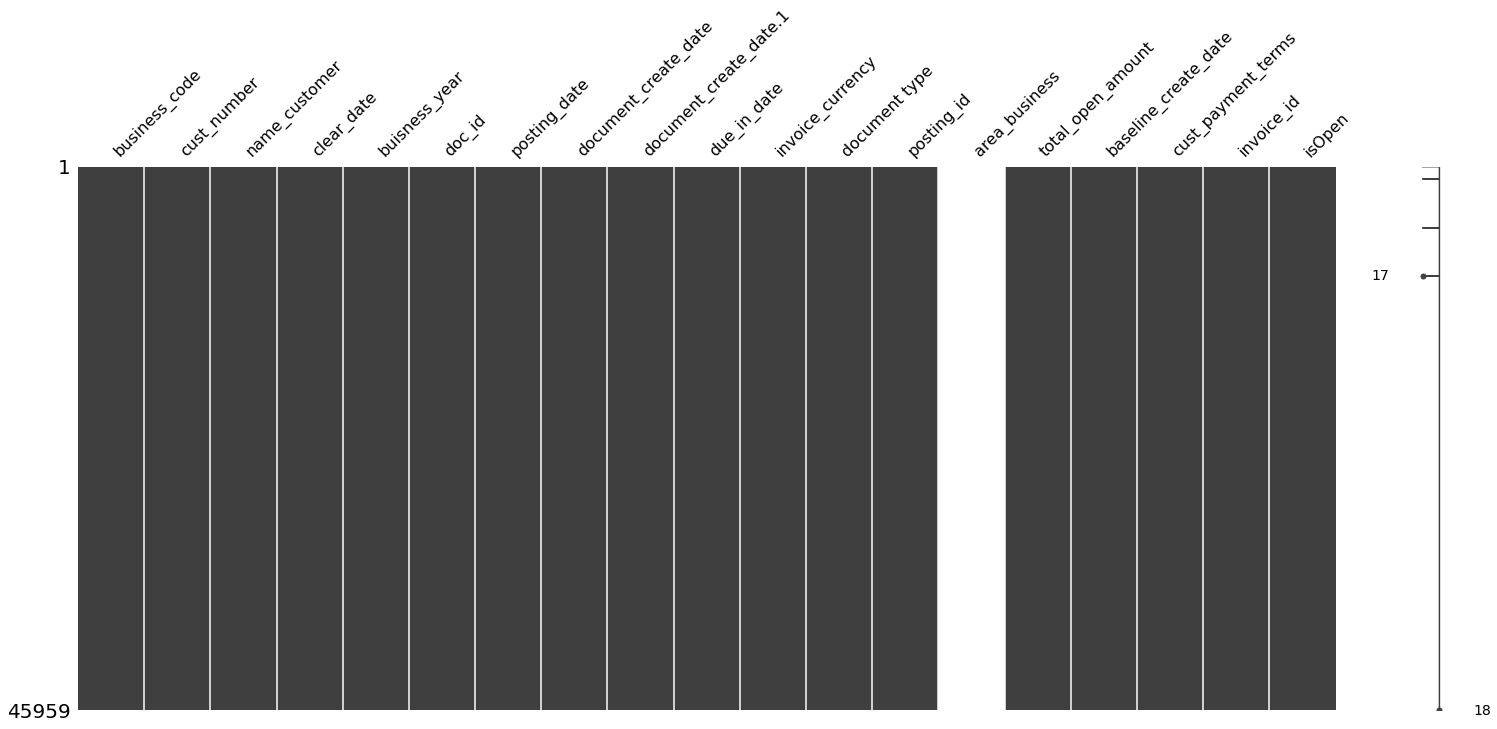


No duplicated entries found

To check: 
Unique count of non-numeric data

business_code            6
cust_number           1411
name_customer         4240
invoice_currency         2
document type            2
cust_payment_terms      73
dtype: int64
Top 5 unique values of business_code
  business_code  Count
0          U001  41568
1          CA02   3578
2          U013    674
3          U002    127
4          U005     10
 
Top 5 unique values of cust_number
  cust_number  Count
0  0200769623  10135
1  0200726979   1787
2  0200762301   1365
3  0200759878   1212
4  0200794332   1010
 
Top 5 unique values of name_customer
         name_customer  Count
0           WAL-MAR co   1036
1  WAL-MAR corporation   1021
2        WAL-MAR trust   1014
3           WAL-MAR us    994
4          WAL-MAR llc    994
 
Top 5 unique values of invoice_currency
  invoice_currency  Count
0              USD  42380
1              CAD   3579
 
Top 5 unique values of document type
  document type  Count
0          

,count,mean,std,min,25%,50%,75%,max
buisness_year,45959.0,2.019130e+03,3.360275e-01,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.020000e+03
doc_id,45959.0,2.011514e+09,2.846097e+08,1.928500e+09,1.929182e+09,1.929728e+09,1.930205e+09,9.500000e+09
document_create_date.1,45959.0,2.019181e+07,3.209912e+03,2.018113e+07,2.019041e+07,2.019072e+07,2.019103e+07,2.020023e+07
posting_id,45959.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
area_business,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,45959.0,3.238637e+04,4.023851e+04,6.500000e-01,4.671120e+03,1.723950e+04,4.677138e+04,7.927663e+05
invoice_id,45955.0,2.010862e+09,2.759132e+08,1.928500e+09,1.929182e+09,1.929727e+09,1.930205e+09,2.960617e+09
isOpen,45959.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


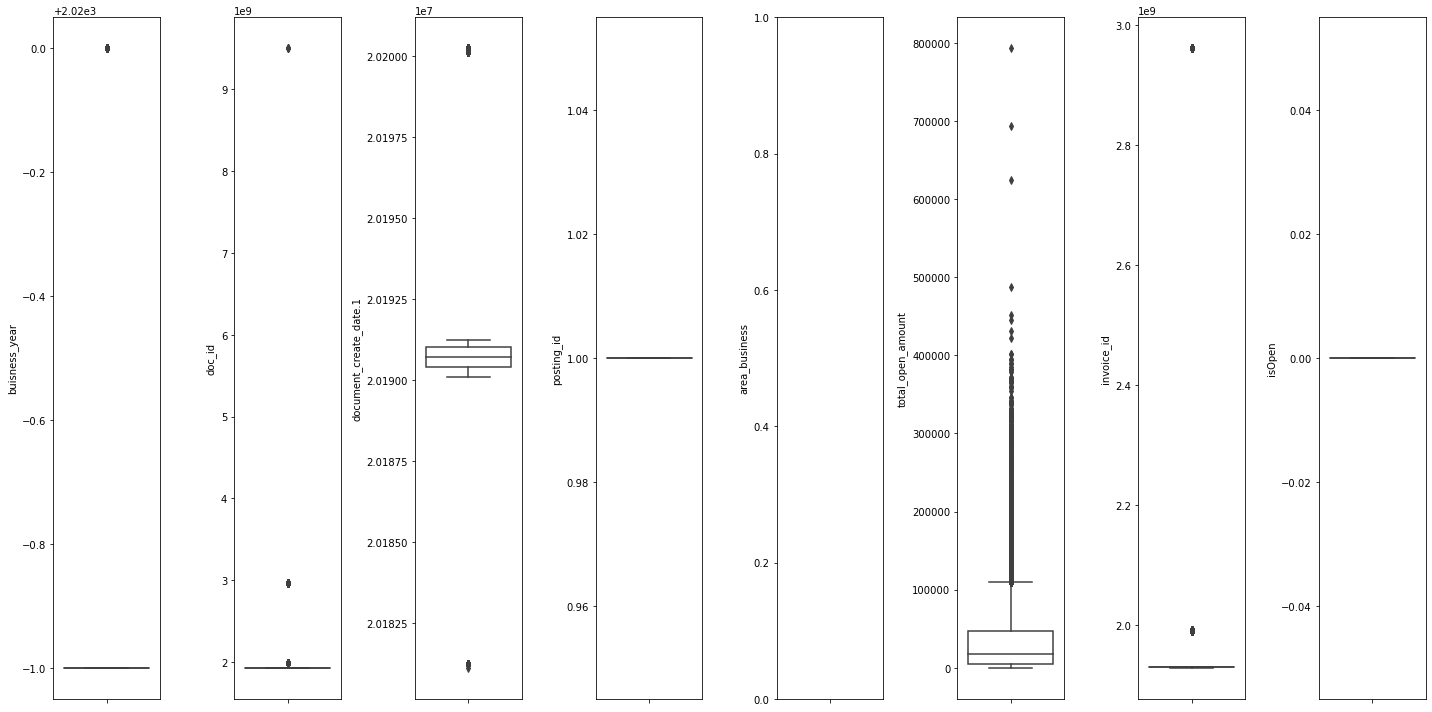


To check pairwise joint distribution of numeric data


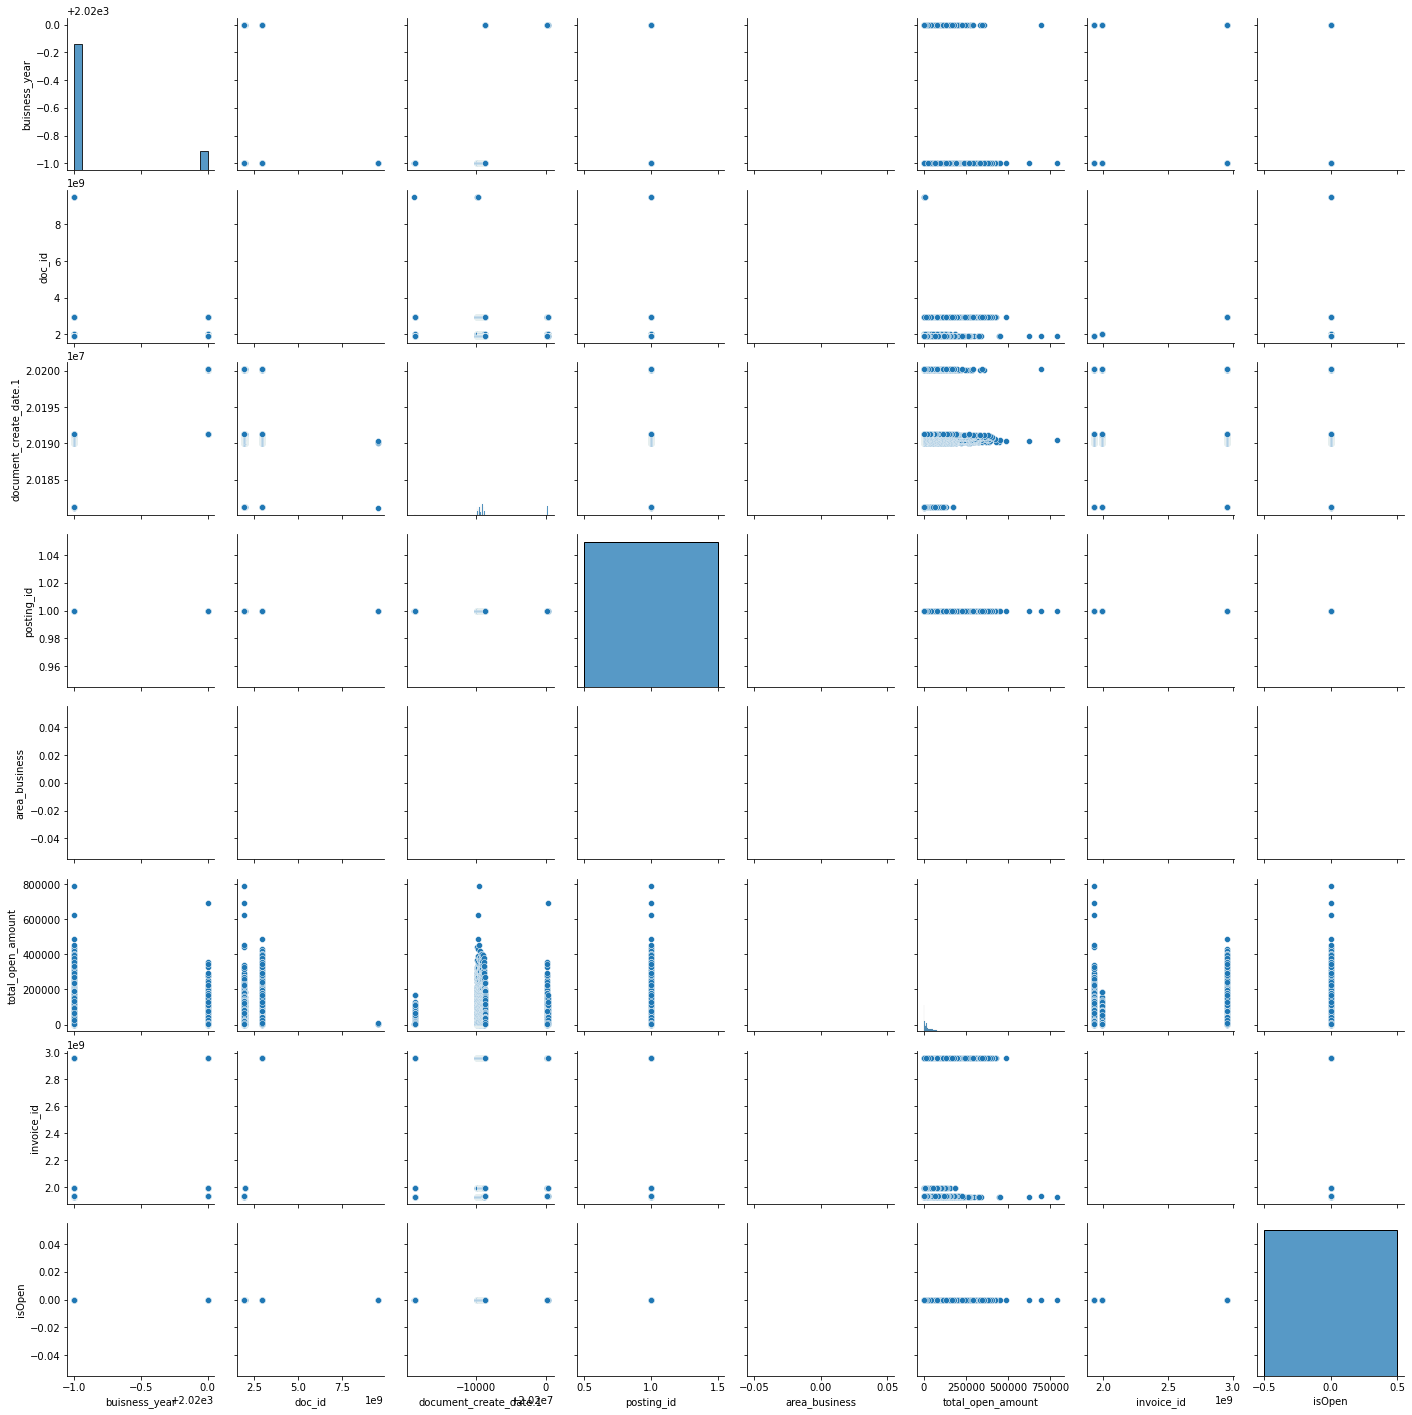


To check time series of numeric data  by daily, monthly and yearly frequency
Plotting daily data


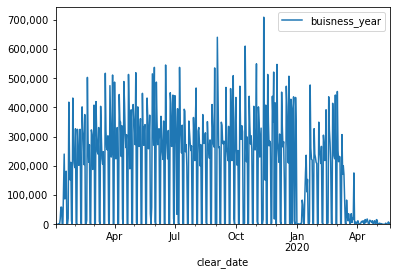

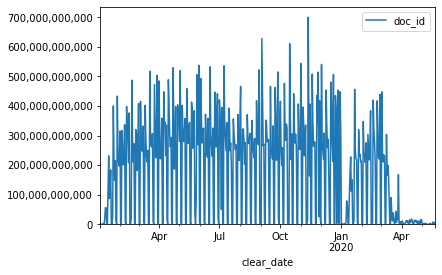

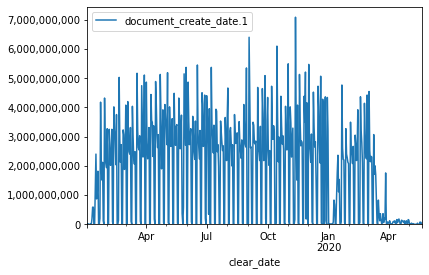

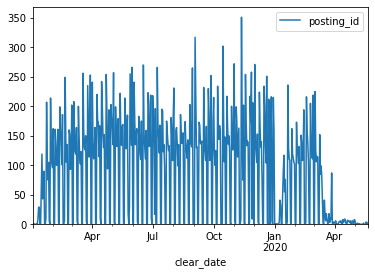

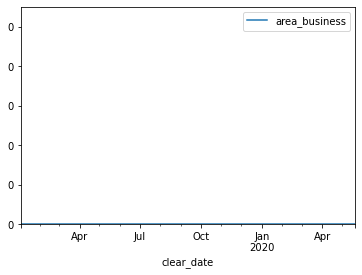

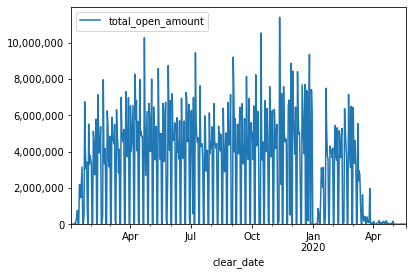

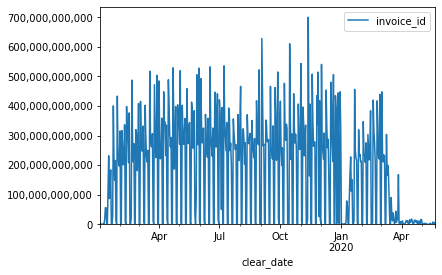

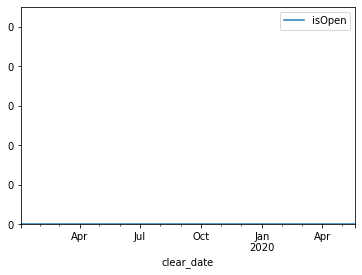

Plotting monthly data


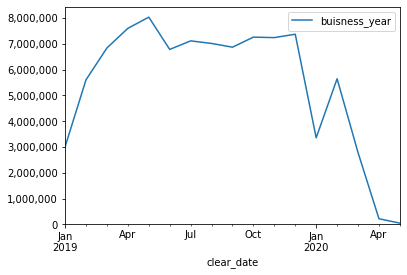

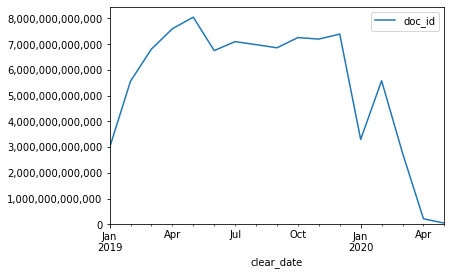

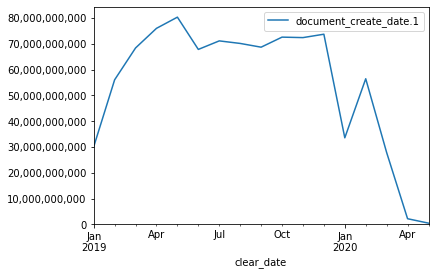

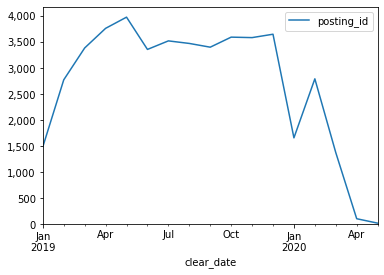

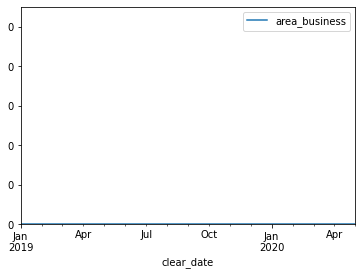

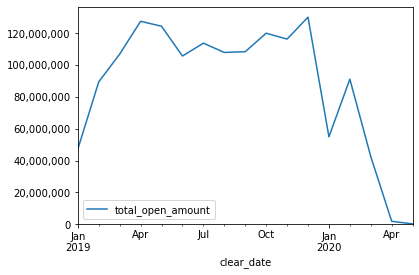

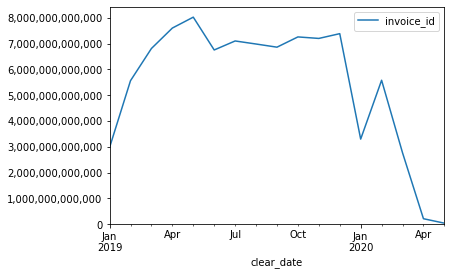

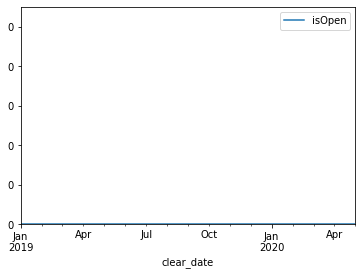

Plotting yearly data


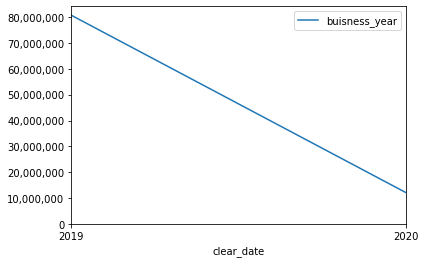

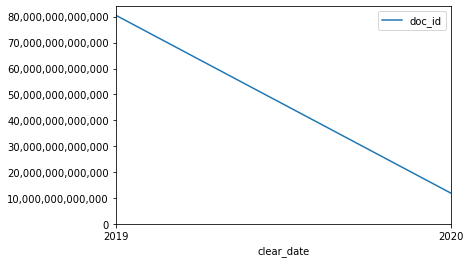

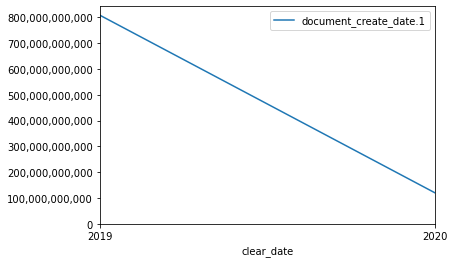

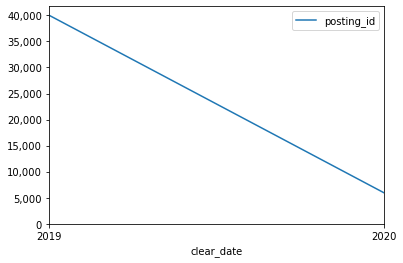

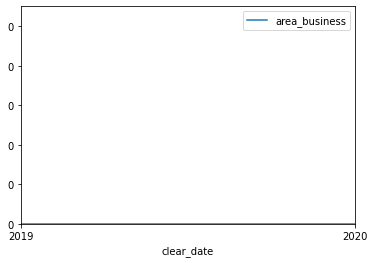

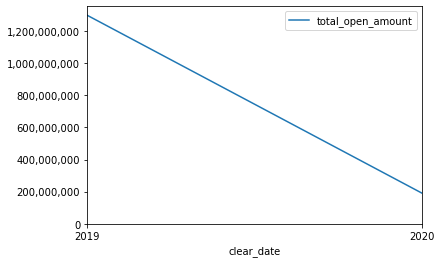

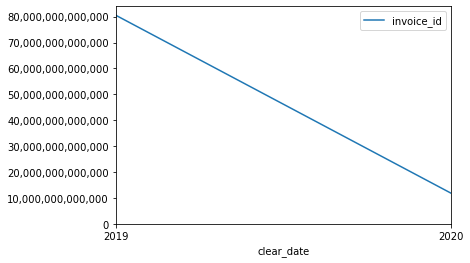

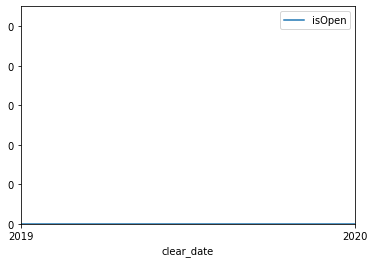

Plotting daily data


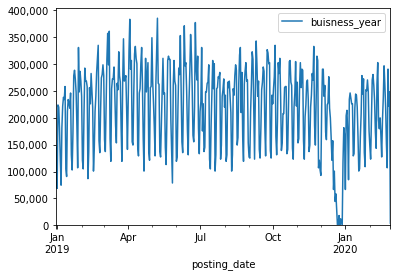

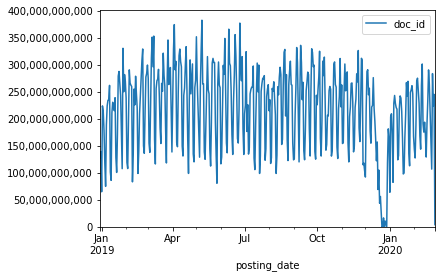

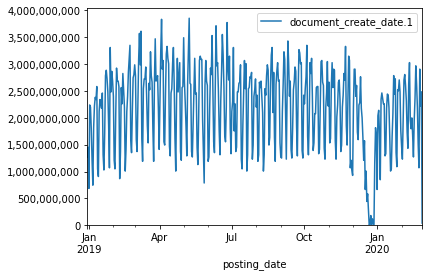

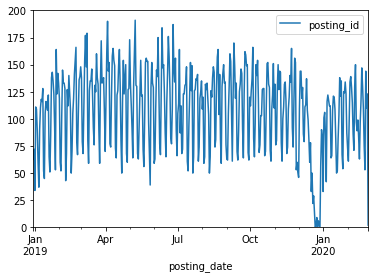

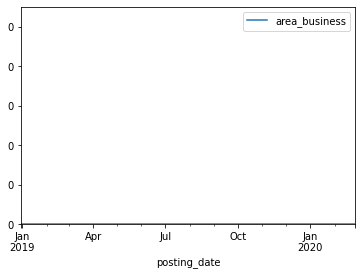

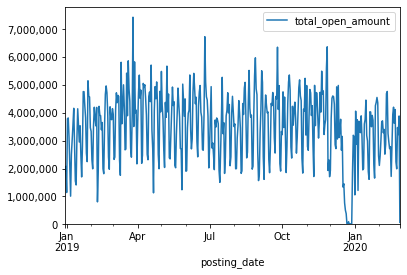

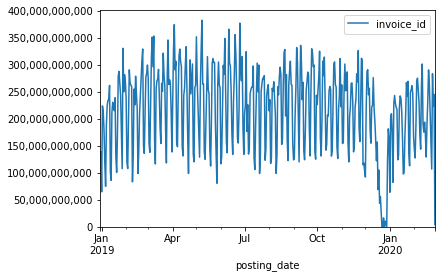

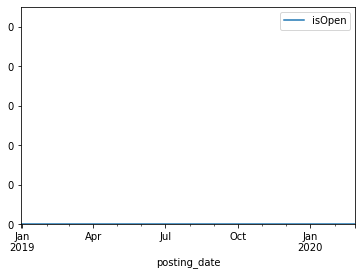

Plotting monthly data


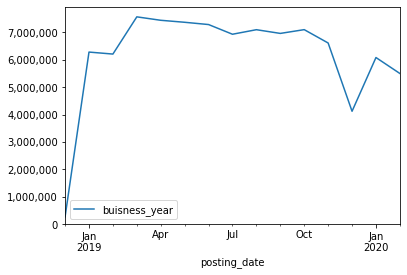

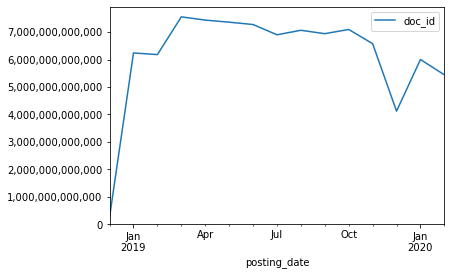

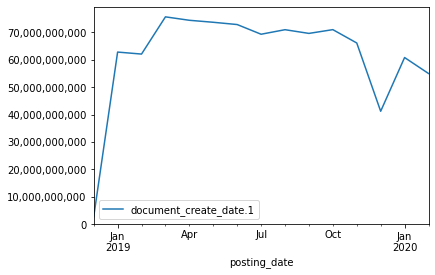

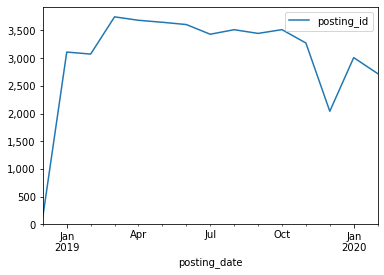

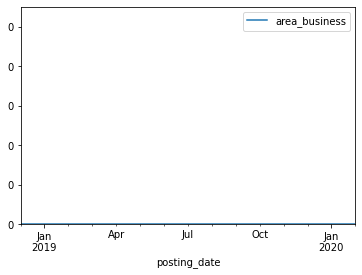

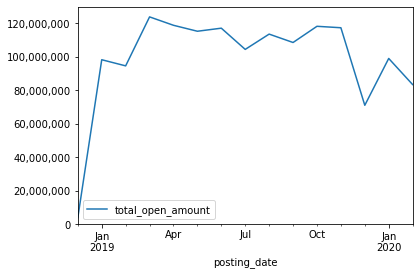

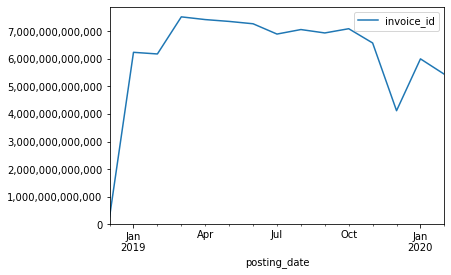

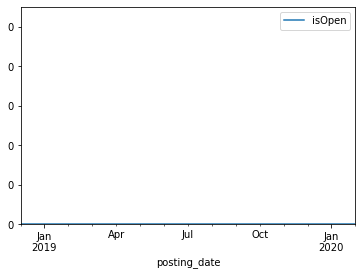

Plotting yearly data


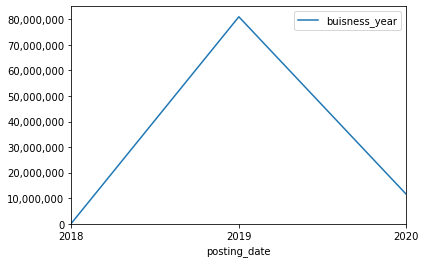

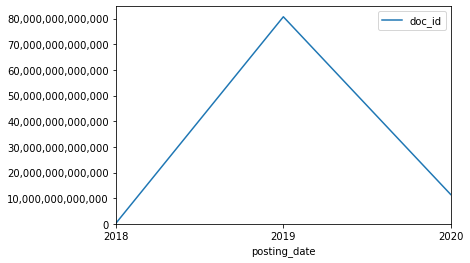

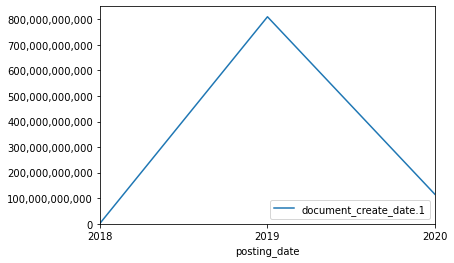

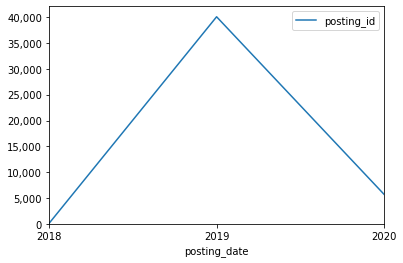

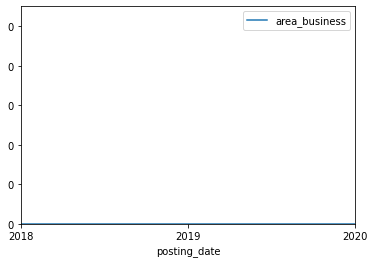

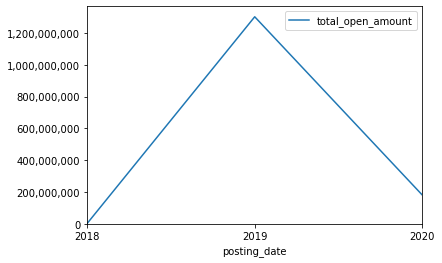

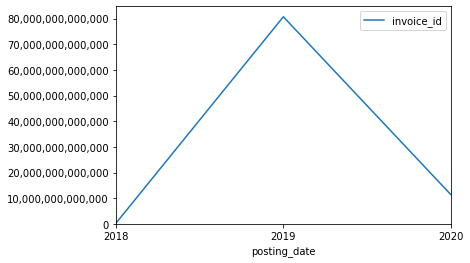

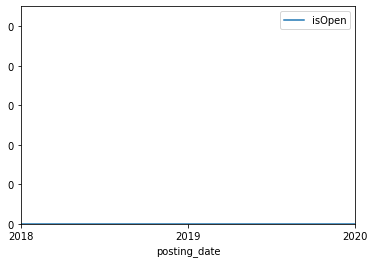

Plotting daily data


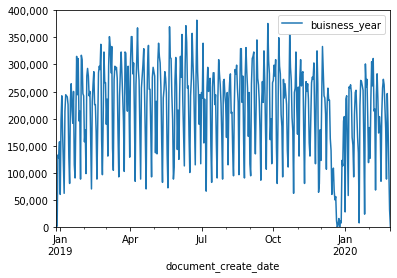

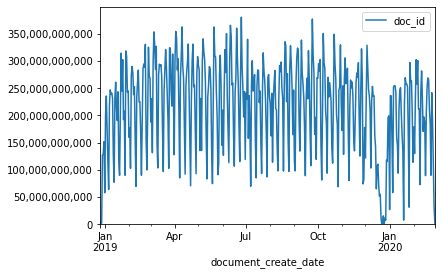

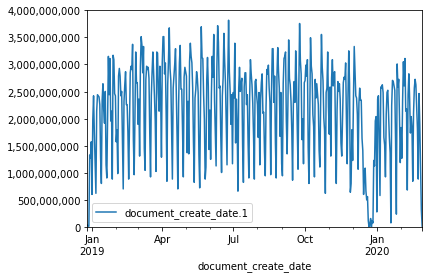

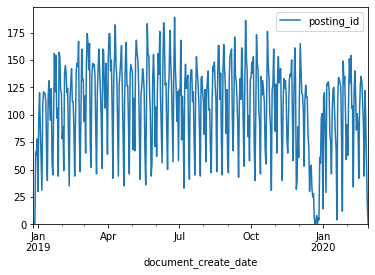

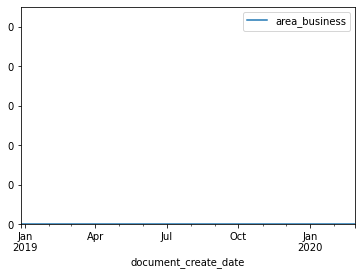

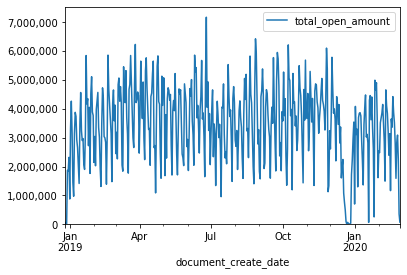

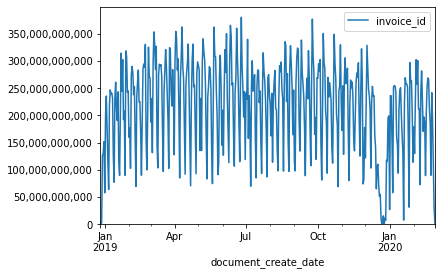

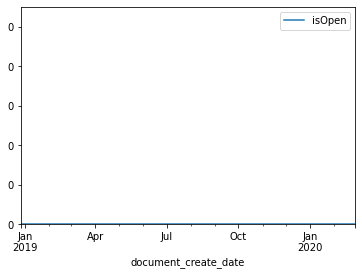

Plotting monthly data


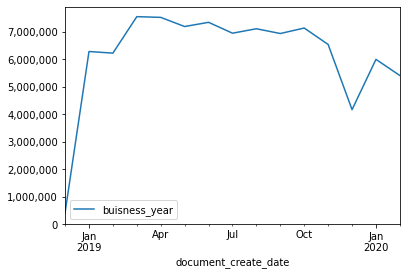

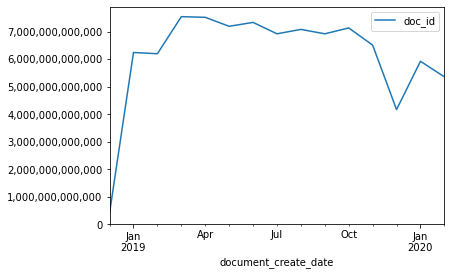

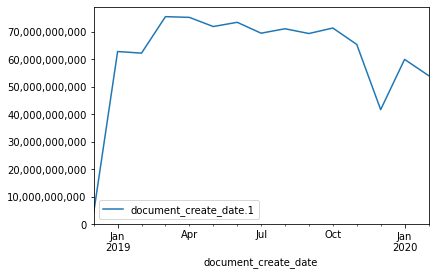

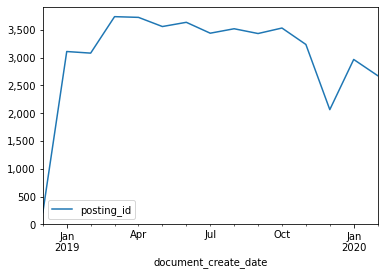

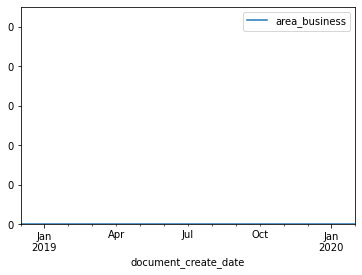

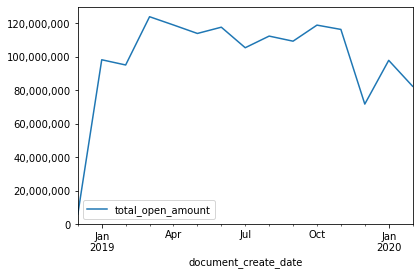

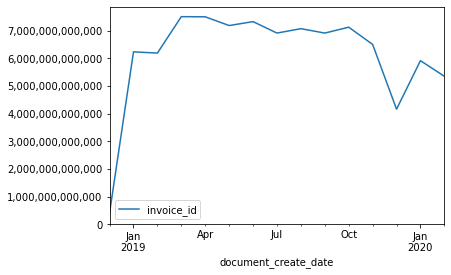

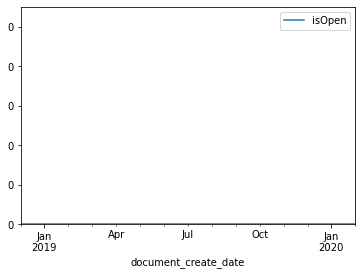

Plotting yearly data


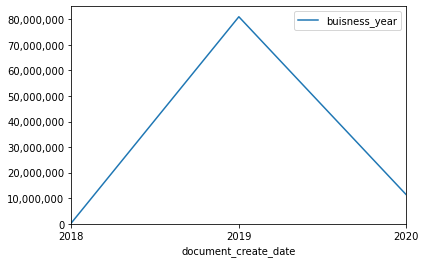

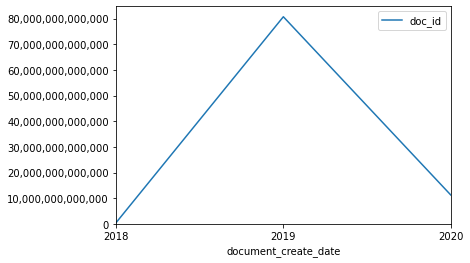

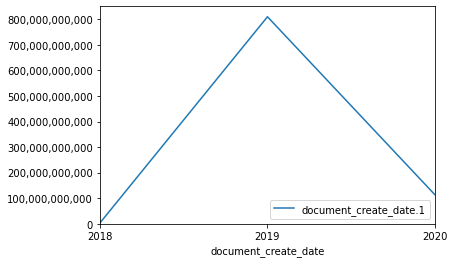

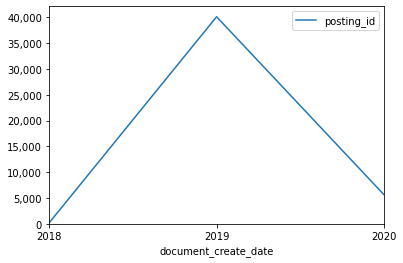

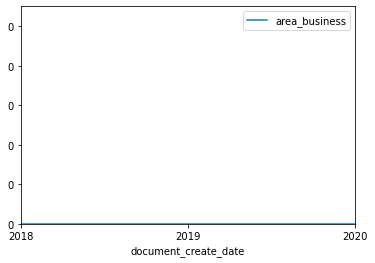

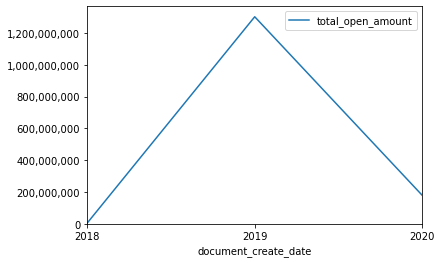

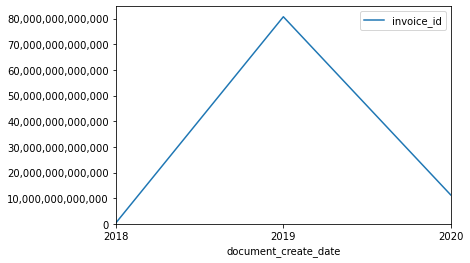

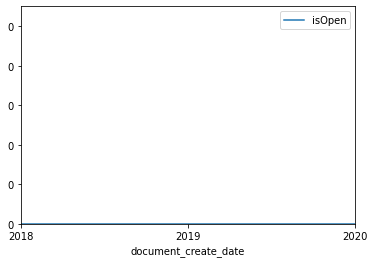

Plotting daily data


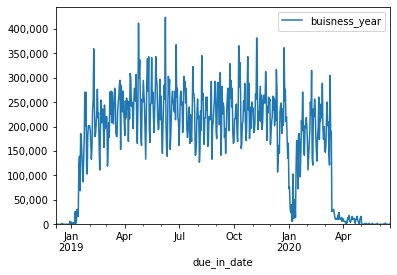

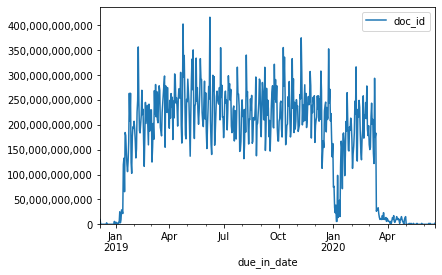

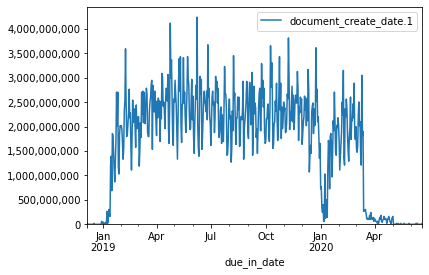

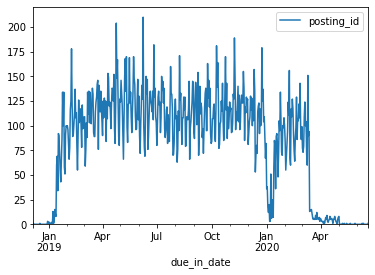

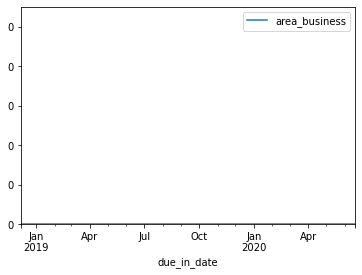

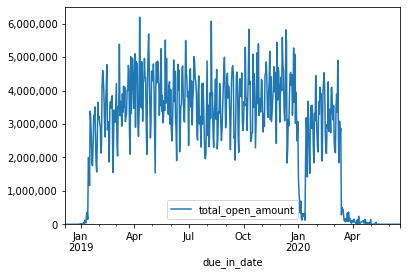

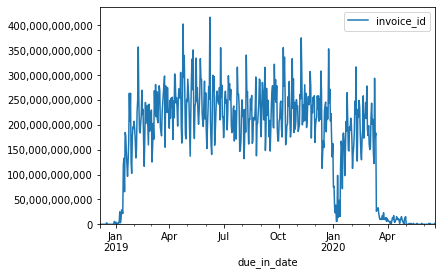

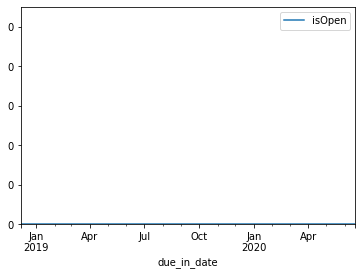

Plotting monthly data


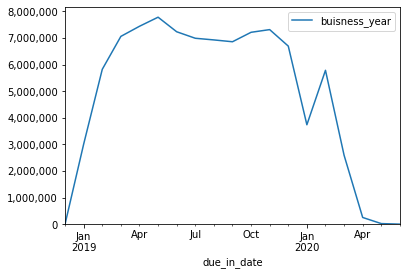

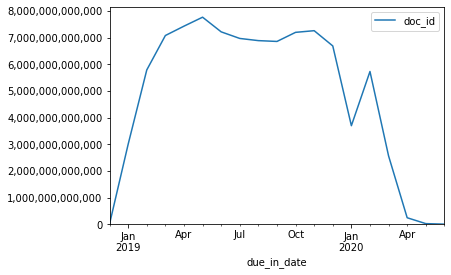

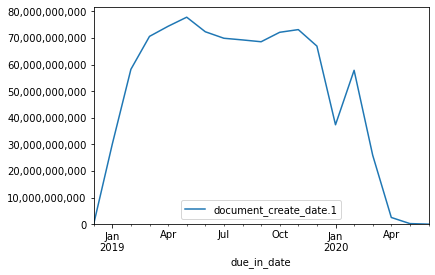

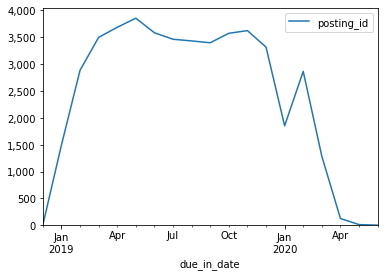

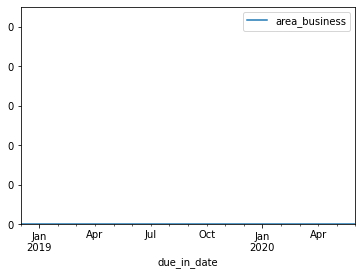

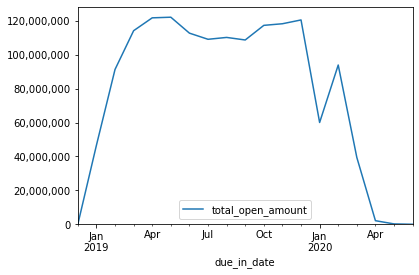

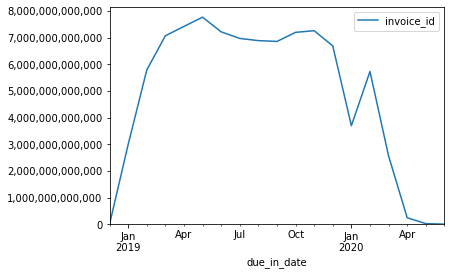

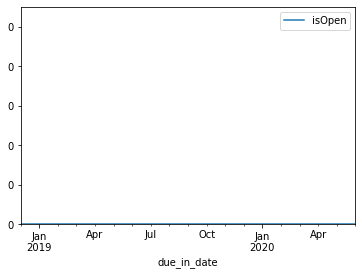

Plotting yearly data


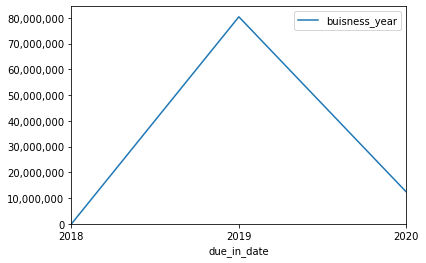

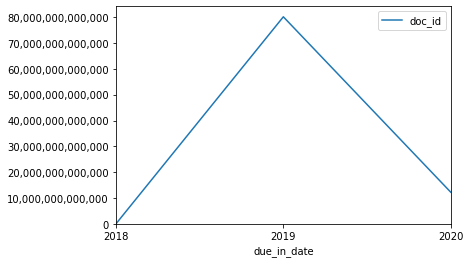

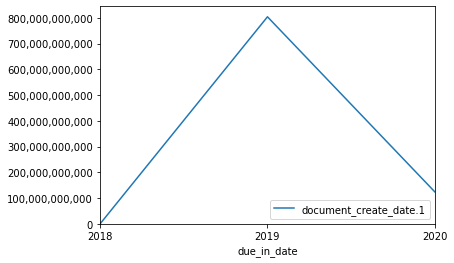

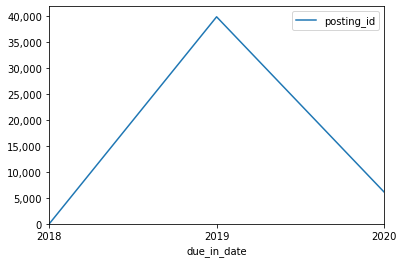

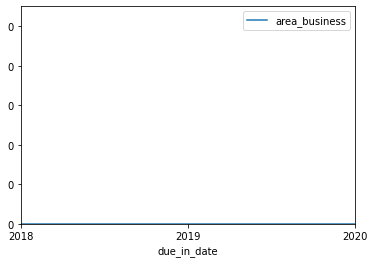

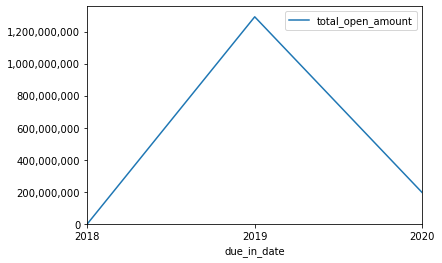

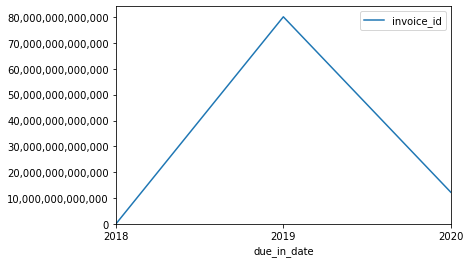

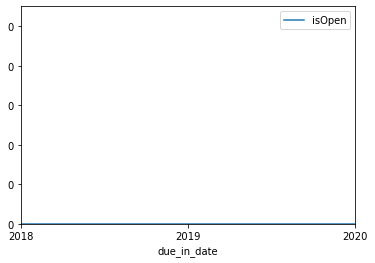

Plotting daily data


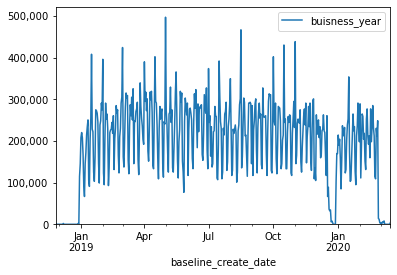

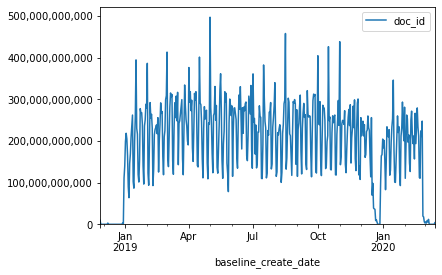

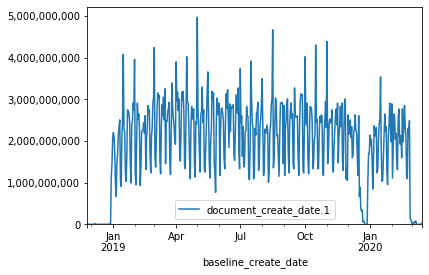

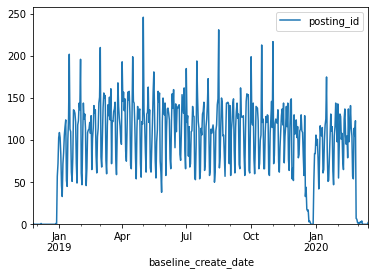

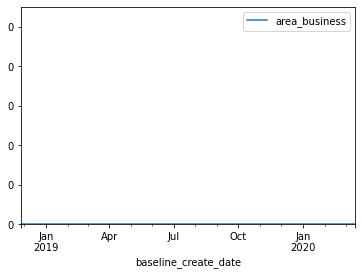

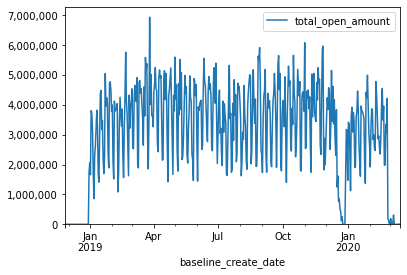

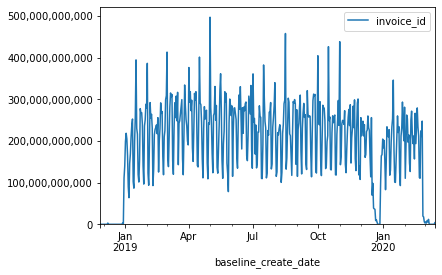

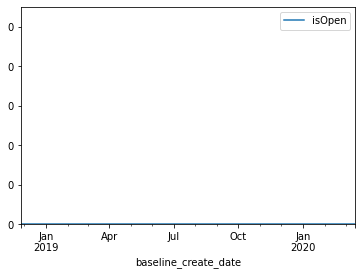

Plotting monthly data


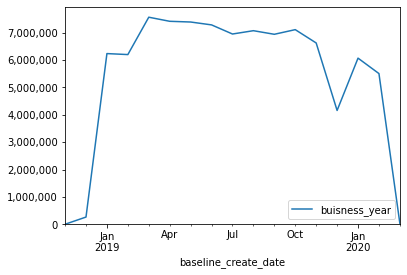

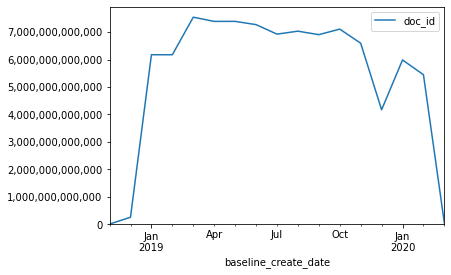

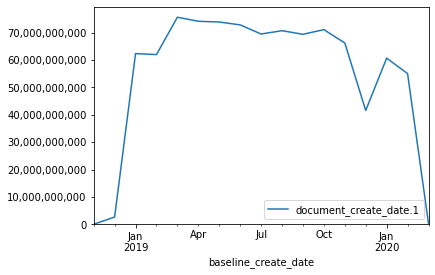

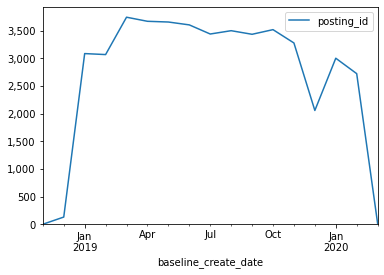

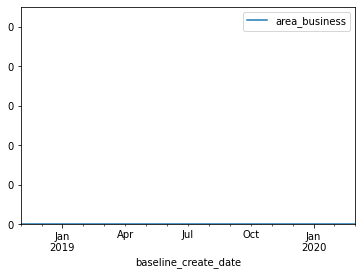

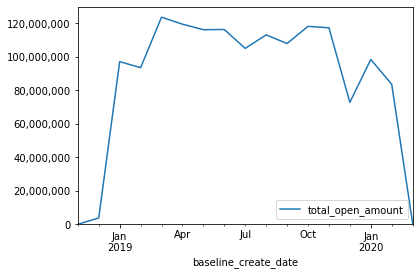

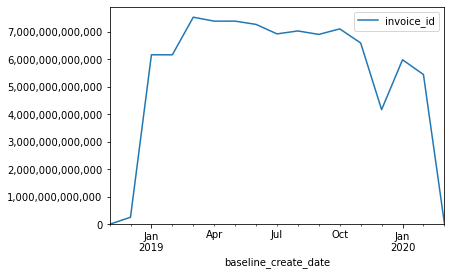

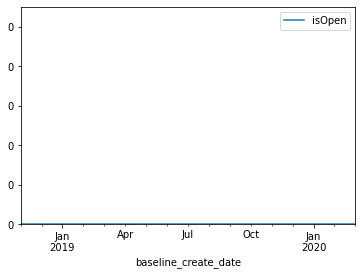

Plotting yearly data


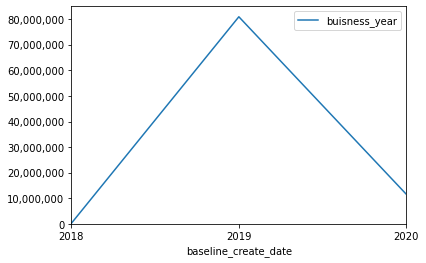

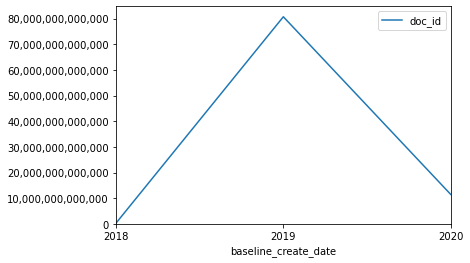

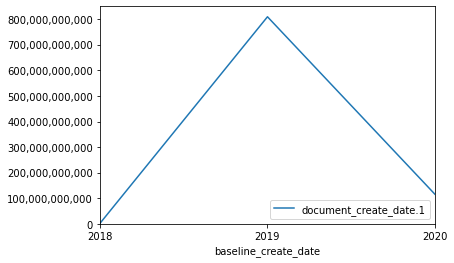

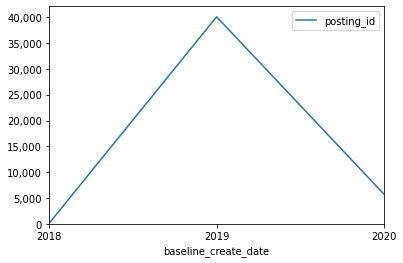

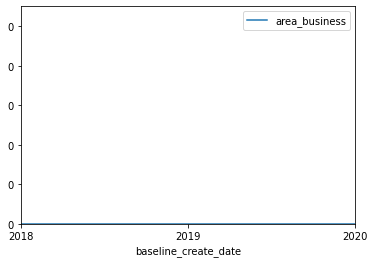

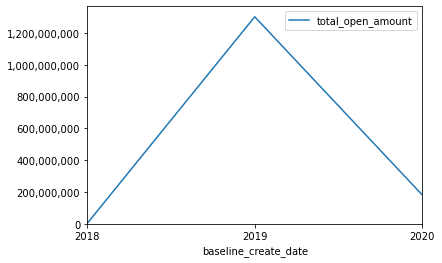

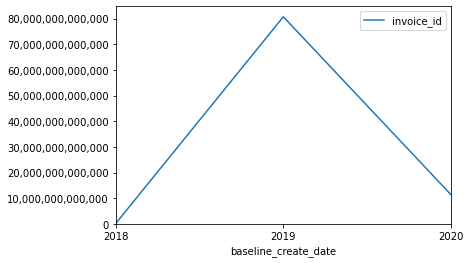

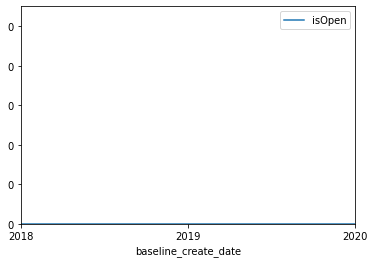

In [17]:
eda(df)